<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment (Problem 1) - Food Classifying Model (Individual)</h2><h3>AY2019/20 Semester</h3></th>
    </tr>
</table>

In [2]:
# Import the Required Packages
import keras
import os
from keras import layers, models, optimizers, regularizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Step 1: Data Loading

In [3]:
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")
img_size = 150

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

validation_generator = validation_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

test_generator = validation_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=20,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [4]:
# Remove before submission
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


## Step 2:  Develop the Image Classification Models

### Model #1

#### Baseline Model

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.summary()







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 32)        9248      
____

In [5]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
375/375 [==============================] - 72s 191ms/step - loss: 2.1507 - acc: 0.1887 - val_loss: 1.9588 - val_acc: 0.2730
Epoch 2/20
375/375 [==============================] - 67s 178ms/step - loss: 2.0158 - acc: 0.2645 - val_loss: 2.0244 - val_acc: 0.2630
Epoch 3/20
375/375 [==============================] - 69s 185ms/step - loss: 1.9215 - acc: 0.3035 - val_loss: 1.9450 - val_acc: 0.2900
Epoch 4/20
375/375 [==============================] - 68s 181ms/step - loss: 1.8391 - acc: 0.3433 - val_loss: 1.7606 - val_acc: 0.3500
Epoch 5/20
375/375 [==============================] - 68s 181ms/step - loss: 1.7828 - acc: 0.3675 - val_loss: 1.5619 - val_acc: 0.4560
Epoch 6/20
375/375 [==============================] - 70s 186ms/step - loss: 1.7408 - acc: 0.3879 - val_loss: 1.6089 - val_acc: 0.4300
Epoch 7/20
375/375 [==============================] - 67s 179ms/step - loss: 1.6931 - acc: 0.40

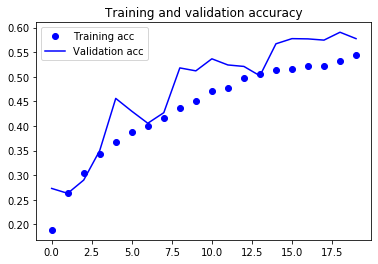

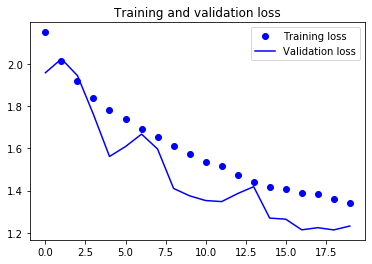

In [6]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Overfitted Model

In [5]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.summary()







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       73856     
____

In [6]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
375/375 [==============================] - 126s 337ms/step - loss: 2.1214 - acc: 0.2092 - val_loss: 1.8685 - val_acc: 0.3090
Epoch 2/20
375/375 [==============================] - 68s 181ms/step - loss: 1.9069 - acc: 0.3121 - val_loss: 1.8145 - val_acc: 0.3400
Epoch 3/20
375/375 [==============================] - 69s 184ms/step - loss: 1.7918 - acc: 0.3723 - val_loss: 1.5729 - val_acc: 0.4530
Epoch 4/20
375/375 [==============================] - 70s 186ms/step - loss: 1.6914 - acc: 0.4235 - val_loss: 1.5597 - val_acc: 0.4595
Epoch 5/20
375/375 [==============================] - 71s 189ms/step - loss: 1.6219 - acc: 0.4444 - val_loss: 1.3951 - val_acc: 0.5150
Epoch 6/20
375/375 [==============================] - 71s 190ms/step - loss: 1.5239 - acc: 0.4813 - val_loss: 1.3036 - val_acc: 0.5450
Epoch 7/20
375/375 [==============================] - 71s 189ms/step - loss: 1.4685 - acc: 0.5

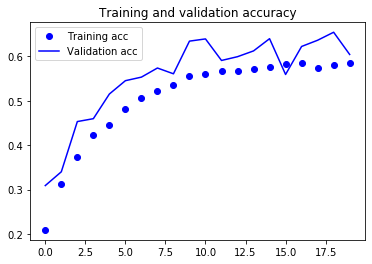

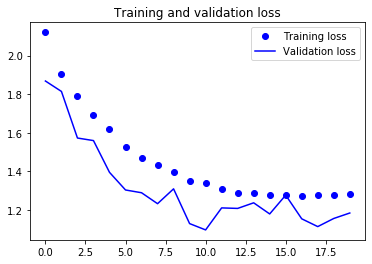

In [7]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_1.h5')

### Model #2

In [7]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((7, 7)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
dropout_2 (Dropout)          (None, 69, 69, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 128)       204928    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 128)       0         
________

In [8]:
# Train the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=375,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
375/375 [==============================] - 84s 223ms/step - loss: 2.2222 - acc: 0.2076 - val_loss: 2.0016 - val_acc: 0.3135
Epoch 2/20
375/375 [==============================] - 40s 105ms/step - loss: 1.8586 - acc: 0.3533 - val_loss: 1.6943 - val_acc: 0.4135
Epoch 3/20
375/375 [==============================] - 41s 109ms/step - loss: 1.6923 - acc: 0.4219 - val_loss: 1.6626 - val_acc: 0.4510
Epoch 4/20
375/375 [==============================] - 43s 115ms/step - loss: 1.5626 - acc: 0.4759 - val_loss: 1.6172 - val_acc: 0.4730
Epoch 5/20
375/375 [==============================] - 40s 106ms/step - loss: 1.4591 - acc: 0.5123 - val_loss: 1.5071 - val_acc: 0.5110
Epoch 6/20
375/375 [==============================] - 40s 106ms/step - loss: 1.3599 - acc: 0.5532 - val_loss: 1.4477 - val_acc: 0.5445
Epoch 7/20
375/375 [==============================] - 39s 105ms/step - loss: 1.2673 - acc: 0.584

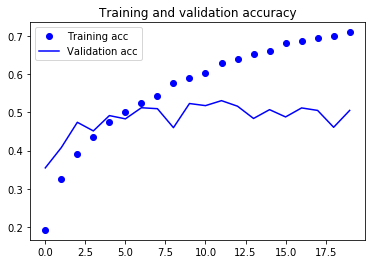

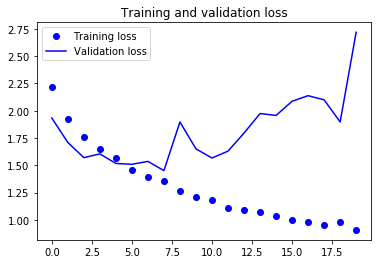

In [6]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [ ]:
# Model #1
model.load_weights('food_model_1.h5')




In [ ]:
# Model #2
model.load_weights('food_model_2.h5')




In [ ]:
# Save the best model


model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [ ]:
# Load the model
model.load_weights('food_model_best.h5')

In [ ]:
# Load the food list (in alphabetical order)
with open('??.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

In [ ]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [ ]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '??.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)